In [87]:
# Importing all necessary libraries
import cv2
import os
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline



In [117]:
three_stack_range = (6.5, 15.65)
five_stack_range = (18, 34)
ball_roll_range = (57, 84.1)
bookshelf_range = (85, 100.2)
bucket_range = (104, 127.2)

length = 11

frames = lambda rng: [int(30*(rng[0]+((rng[1]-rng[0])*i)/float(length))) for i in range(length)]

print(frames(three_stack_range))
print(frames(five_stack_range))
print(frames(ball_roll_range))
print(frames(bookshelf_range))
print(frames(bucket_range))

all_frames = [
[195, 219, 244, 269, 294, 319, 344, 369, 394, 419, 444],
[540, 583, 627, 670, 714, 758, 801, 845, 889, 932, 976],
[1710, 1783, 1857, 1931, 2005, 2079, 2153, 2227, 2301, 2375, 2449],
[2550, 2591, 2632, 2674, 2715, 2757, 2798, 2840, 2881, 2923, 2964],
[3120, 3183, 3246, 3309, 3373, 3436, 3499, 3562, 3626, 3689, 3752]
]



[195, 219, 244, 269, 294, 319, 344, 369, 394, 419, 444]
[540, 583, 627, 670, 714, 758, 801, 845, 889, 932, 976]
[1710, 1783, 1857, 1931, 2005, 2079, 2153, 2227, 2301, 2375, 2449]
[2550, 2591, 2632, 2674, 2715, 2757, 2798, 2840, 2881, 2923, 2964]
[3120, 3183, 3246, 3309, 3373, 3436, 3499, 3562, 3626, 3689, 3752]


Figure(3456x1440)
0 0
(720, 1280, 3)
0 1
(720, 1280, 3)
0 2
(720, 1280, 3)
0 3
(720, 1280, 3)
0 4
(720, 1280, 3)
0 5
(720, 1280, 3)
0 6
(720, 1280, 3)
0 7
(720, 1280, 3)
0 8
(720, 1280, 3)
0 9
(720, 1280, 3)
0 10
(720, 1280, 3)
1 0
(720, 1280, 3)
1 1
(720, 1280, 3)
1 2
(720, 1280, 3)
1 3
(720, 1280, 3)
1 4
(720, 1280, 3)
1 5
(720, 1280, 3)
1 6
(720, 1280, 3)
1 7
(720, 1280, 3)
1 8
(720, 1280, 3)
1 9
(720, 1280, 3)
1 10
(720, 1280, 3)
2 0
(720, 1280, 3)
2 1
(720, 1280, 3)
2 2
(720, 1280, 3)
2 3
(720, 1280, 3)
2 4
(720, 1280, 3)
2 5
(720, 1280, 3)
2 6
(720, 1280, 3)
2 7
(720, 1280, 3)
2 8
(720, 1280, 3)
2 9
(720, 1280, 3)
2 10
(720, 1280, 3)
3 0
(720, 1280, 3)
3 1
(720, 1280, 3)
3 2
(720, 1280, 3)
3 3
(720, 1280, 3)
3 4
(720, 1280, 3)
3 5
(720, 1280, 3)
3 6
(720, 1280, 3)
3 7
(720, 1280, 3)
3 8
(720, 1280, 3)
3 9
(720, 1280, 3)
3 10
(720, 1280, 3)
4 0
(720, 1280, 3)
4 1
(720, 1280, 3)
4 2
(720, 1280, 3)
4 3
(720, 1280, 3)
4 4
(720, 1280, 3)
4 5
(720, 1280, 3)
4 6
(720, 1280, 3)
4 7
(720,

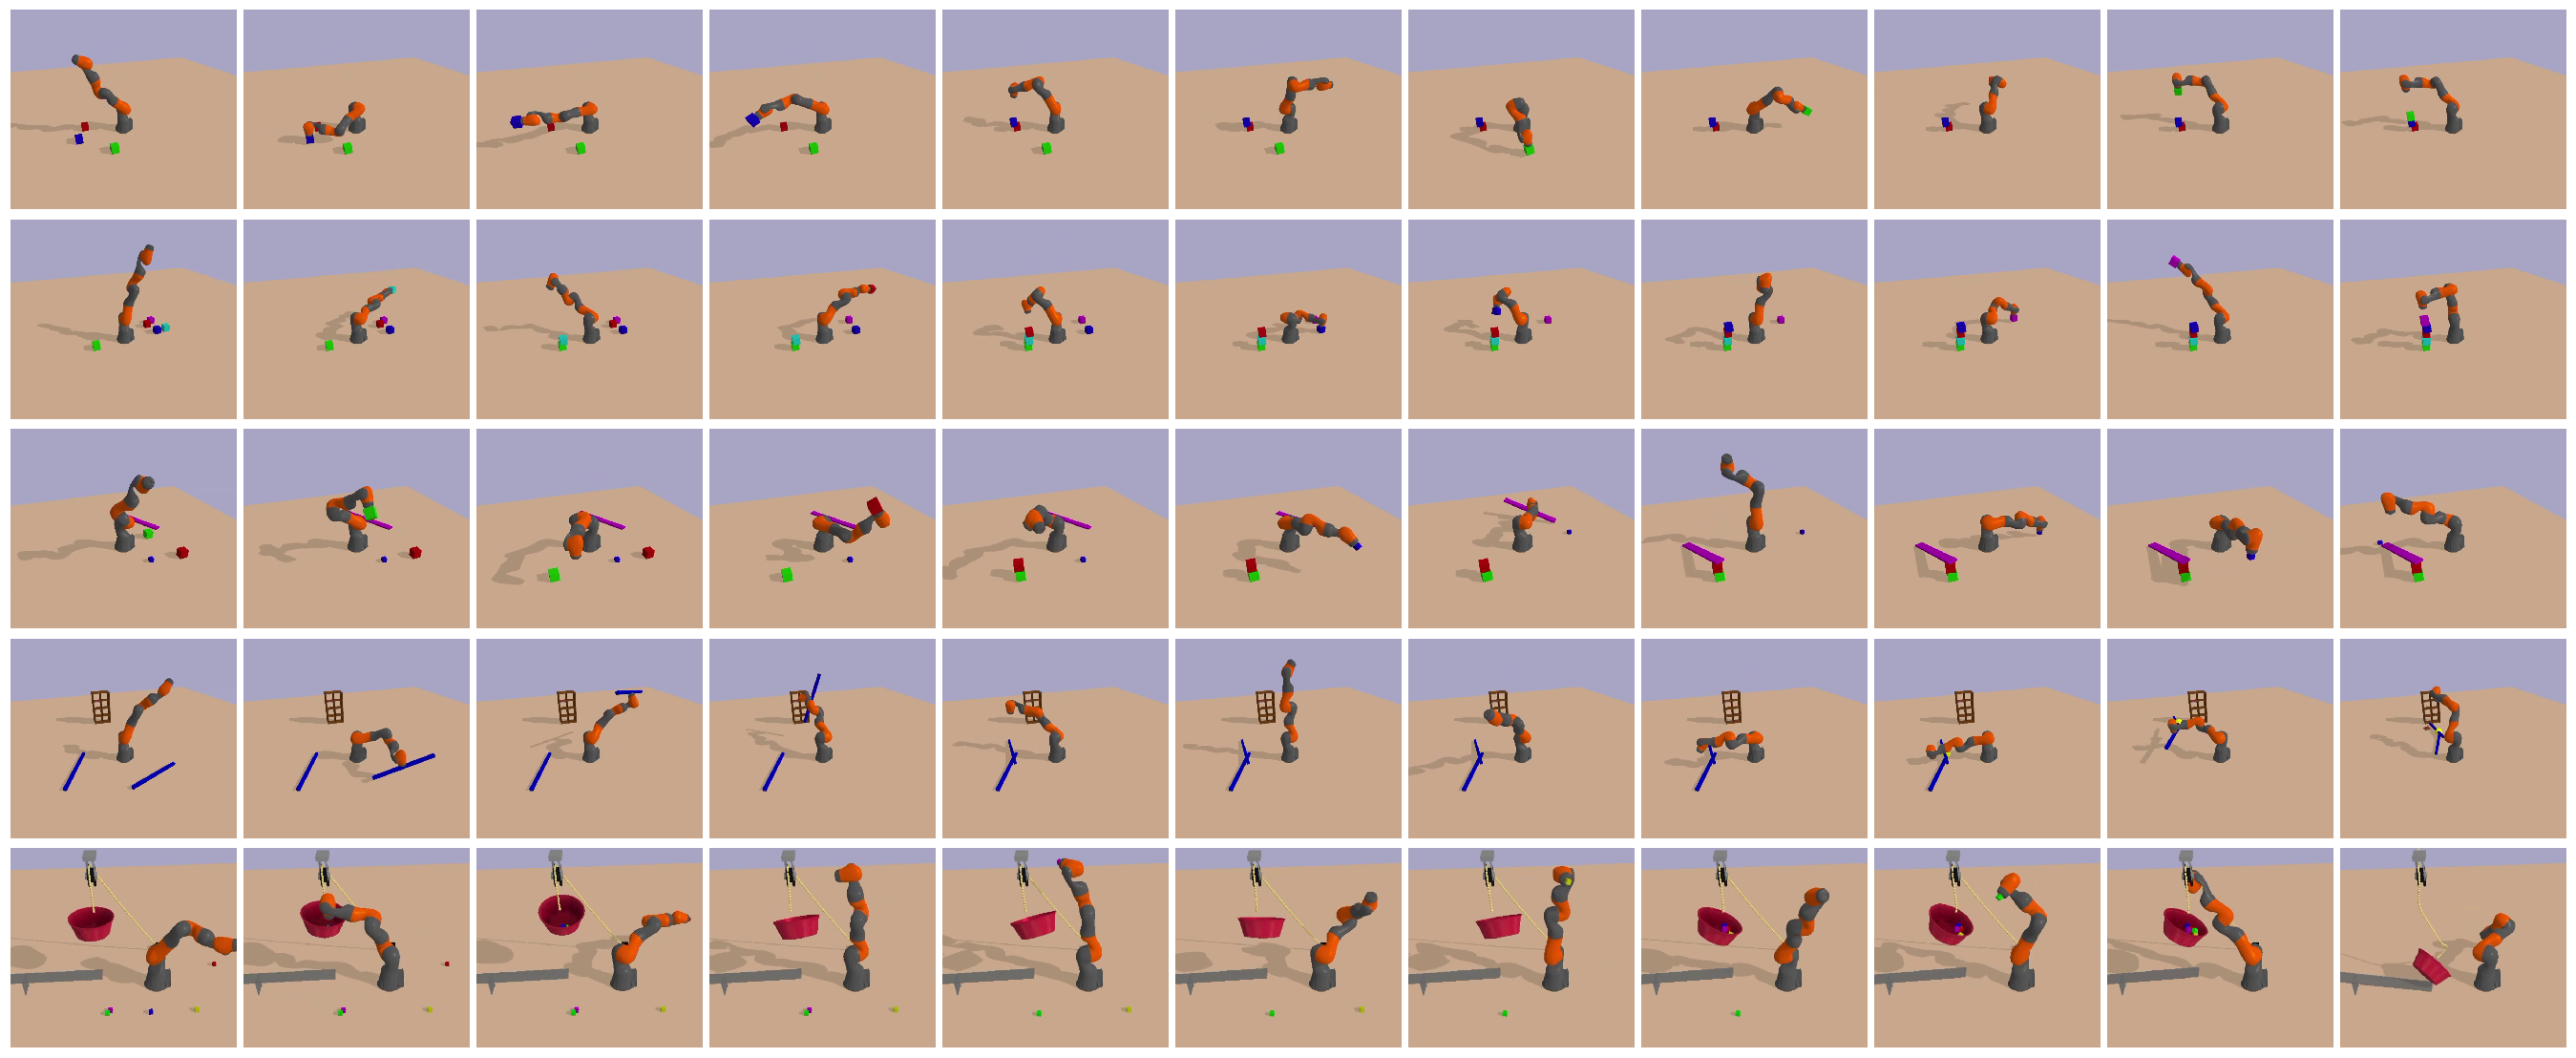

In [122]:
# Read the video from specified path
cam = cv2.VideoCapture("./CSP.mp4")

try:
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')

    # if not created then raise error
except OSError:
    print('Error: Creating directory of data')

# frame
currentframe = 0

fig = plt.figure(figsize = (48, 20))
print(fig)
gs1 = gridspec.GridSpec(len(all_frames), len(all_frames[0]))
gs1.update(wspace=0.025, hspace=0.05)

print(gs1[0])

for time in range(0, 4000):
    # reading from frame
    ret, frame = cam.read()
    gs_index = 0
    for i, sub_frames in enumerate(all_frames):
        for j, aframe in enumerate(sub_frames):
            if(aframe == time):
                print(i, j)
                # writing the extracted images
        #         cv2.imwrite(name, frame)
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                ax = plt.subplot(gs1[gs_index])
                plt.axis('off')
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                ax.set_xticks([])
                ax.set_yticks([])
                print(frame.shape)
                if(i!=4):
                    ax.imshow(frame[0:600, 300:980, :])
                else:
                    ax.imshow(frame[50:650, 400:1080, :])                    

            gs_index+=1
    
                



cam.release()
cv2.destroyAllWindows()

pp = PdfPages('frames.pdf')
fig = plt.gcf()
pp.savefig(fig)